In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immigration-to-canada-ibm-dataset/Canada.xlsx


In [6]:
!pip install openpyxl

     |████████████████████████████████| 243 kB 904 kB/s eta 0:00:01


In [7]:
df = pd.read_excel('/kaggle/input/immigration-to-canada-ibm-dataset/Canada.xlsx',
                  sheet_name = 'Canada by Citizenship',
                  skiprows=range(20),
                  skipfooter=2
                  )  

In [8]:
df = df.set_index("OdName")

In [9]:
df = df.iloc[:, :42]

In [10]:
df["Total"] = df.sum(axis = 1)

In [11]:
df

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,99903
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,...,161,140,122,133,128,211,160,174,217,5744


In [12]:
df_years = df.iloc[:, 8:]

In [13]:
df_years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,99903
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,1,2,1,6,0,18,7,12,7,18,...,161,140,122,133,128,211,160,174,217,5744


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df_top10 = df_years.sort_values("Total", ascending=False).iloc[0:10]

In [16]:
df_top10

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,243833
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,183261
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,155696
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,145324


In [17]:
years = list(map(str, df_top10.columns[:-1]))

<AxesSubplot:title={'center':'Countries with the most immigrants in Canada (1980 - 2013)'}, xlabel='Year', ylabel='No. of Immigrants'>

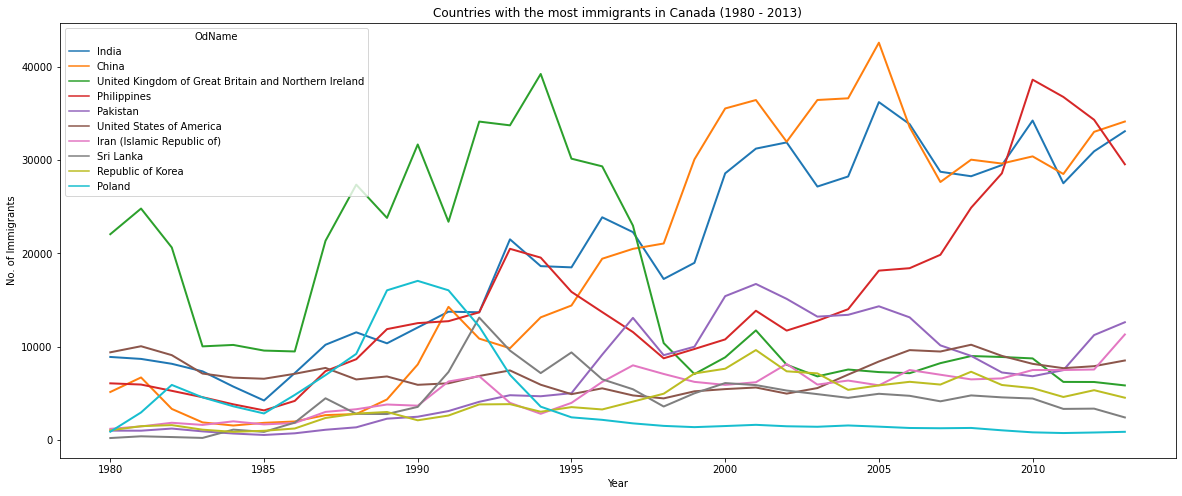

In [18]:
plt.figure(figsize=(20,8))
plt.title("Countries with the most immigrants in Canada (1980 - 2013)")
plt.xlabel("Year")
plt.ylabel("No. of Immigrants")
sns.lineplot(data = df_top10.drop("Total", axis=1).transpose(), lw=2, palette='tab10', dashes=False)



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':"Immigrant's origin countries development status"}, xlabel='DevName', ylabel='count'>

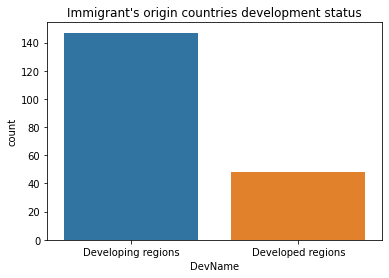

In [19]:
plt.title("Immigrant's origin countries development status")
sns.countplot(df.DevName)

In [20]:
df_continents = df.groupby("AreaName").sum().iloc[:, 3:]
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
AreaName,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,93736


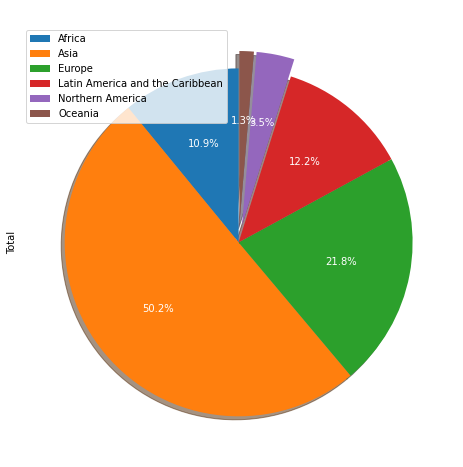

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
df_continents.plot(kind="pie",
                   y ="Total",
                   ax = ax,
                   textprops={'color':"w"},
                   autopct = '%1.1f%%',
                   startangle=90,
                   shadow = True,
                   explode = [0,0,0,0,.1,.1],
#                    pctdistance= .9,
                   labels = None
                  )
plt.title("Immigrant's region origin", color = 'white', size=16)
plt.legend(labels=df_continents.index, loc='upper left') 
# plt.text(color="white")
ax.tick_params(axis='x', colors='red')

<AxesSubplot:ylabel='AreaName'>

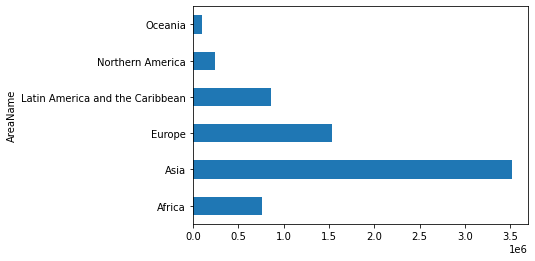

In [22]:
df_continents.Total.plot(kind = 'barh')

In [23]:
df_id = df.loc["Indonesia"]
df_id

Type                Immigrants
Coverage            Foreigners
AREA                       935
AreaName                  Asia
REG                        920
RegName     South-Eastern Asia
DEV                        902
DevName     Developing regions
1980                       186
1981                       178
1982                       252
1983                       115
1984                       123
1985                       100
1986                       127
1987                       213
1988                       270
1989                       260
1990                       227
1991                       252
1992                       243
1993                       278
1994                       262
1995                       205
1996                       231
1997                       166
1998                       165
1999                       525
2000                      1138
2001                       907
2002                       709
2003                       515
2004    

In [24]:
df_sea = df[df.RegName == "South-Eastern Asia"]
df_sea

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,79,6,...,4,5,11,10,5,12,6,3,6,3357
Cambodia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,12,19,...,370,529,460,354,203,200,196,233,288,9295
Indonesia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,186,178,...,632,613,657,661,504,712,390,395,387,15907
Lao People's Democratic Republic,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,11,6,...,42,74,53,32,39,54,22,25,15,3846
Malaysia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,786,816,...,593,580,600,658,640,802,409,358,204,27174
Myanmar,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,80,62,...,210,953,1887,975,1153,556,368,193,262,12002
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Singapore,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,241,301,...,392,298,690,734,366,805,219,146,141,17336
Thailand,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,56,53,...,575,500,487,519,512,499,396,296,400,11931


<AxesSubplot:title={'center':'Immigrants from Southeast Asia'}, xlabel='Year', ylabel='No. of Immigrants'>

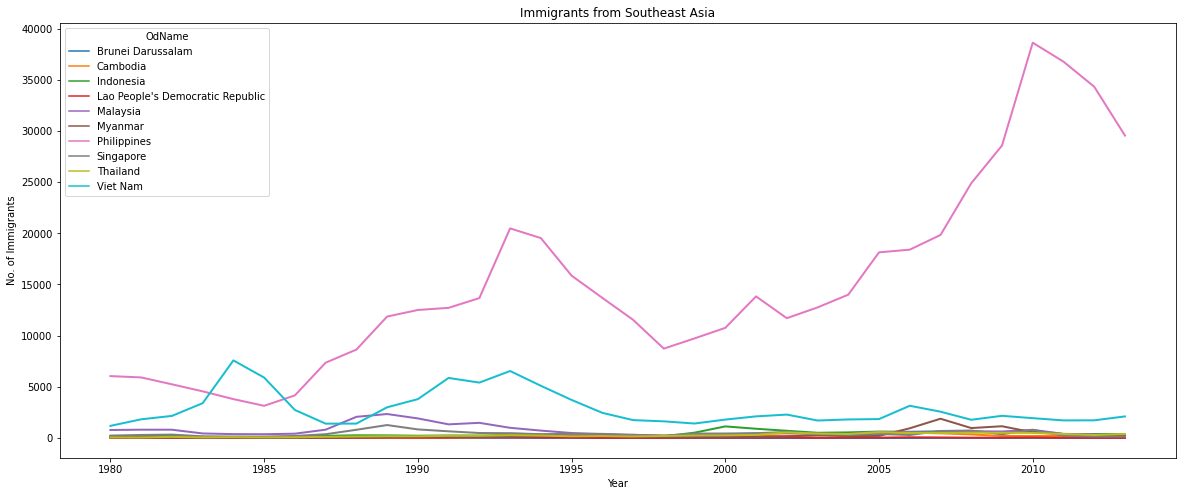

In [25]:
plt.figure(figsize=(20,8))
plt.title("Immigrants from Southeast Asia")
plt.xlabel("Year")
plt.ylabel("No. of Immigrants")
sns.lineplot(data = df_sea.iloc[:, 8:-1].transpose(), lw=2, palette='tab10', dashes=False)


In [26]:
import folium
df_sea

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,79,6,...,4,5,11,10,5,12,6,3,6,3357
Cambodia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,12,19,...,370,529,460,354,203,200,196,233,288,9295
Indonesia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,186,178,...,632,613,657,661,504,712,390,395,387,15907
Lao People's Democratic Republic,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,11,6,...,42,74,53,32,39,54,22,25,15,3846
Malaysia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,786,816,...,593,580,600,658,640,802,409,358,204,27174
Myanmar,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,80,62,...,210,953,1887,975,1153,556,368,193,262,12002
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Singapore,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,241,301,...,392,298,690,734,366,805,219,146,141,17336
Thailand,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,56,53,...,575,500,487,519,512,499,396,296,400,11931


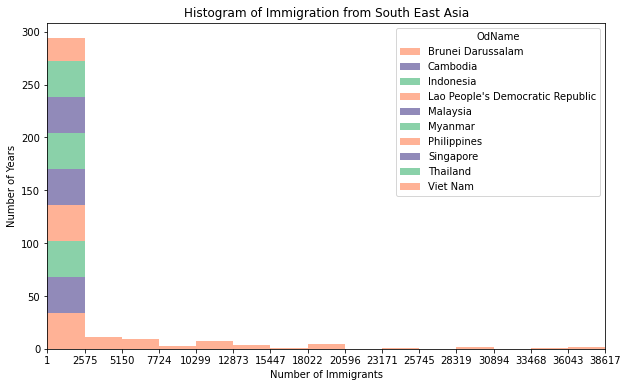

In [27]:
count, bin_edges = np.histogram(df_sea.iloc[:, 8:-1].transpose(), 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_sea.iloc[:, 8:-1].transpose().plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax),
          alpha=0.6
                                      
         )

plt.title('Histogram of Immigration from South East Asia')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [28]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [40]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [37]:
df_temp = df.reset_index()
df_temp = df_temp.rename(columns = {'OdName':"Country"})

In [41]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_temp,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map